In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


C:\Users\hp\anaconda3\envs\ai_envi\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


C:\Users\hp\anaconda3\envs\ai_envi\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8917 - loss: 0.3540 - val_accuracy: 0.9852 - val_loss: 0.0536
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9837 - loss: 0.0503 - val_accuracy: 0.9867 - val_loss: 0.0435
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9905 - loss: 0.0323 - val_accuracy: 0.9900 - val_loss: 0.0372
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9919 - loss: 0.0245 - val_accuracy: 0.9907 - val_loss: 0.0353
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9944 - loss: 0.0165 - val_accuracy: 0.9905 - val_loss: 0.0342


In [6]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9864 - loss: 0.0443
Test accuracy: 0.99


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicted Digit: 7


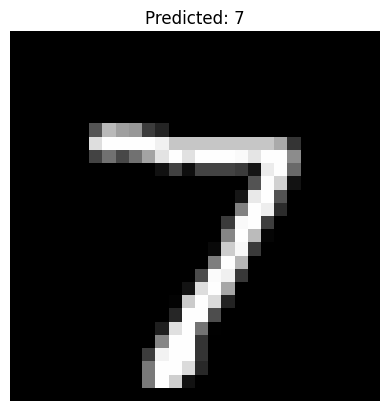

In [7]:
pred = model.predict(x_test[:1])
predicted_class = np.argmax(pred)
print(f"Predicted Digit: {predicted_class}")

plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


In [8]:
model.save('mnist_cnn_model.h5')
